In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../uscode')

In [3]:
from uscode import USCode
from citation_network import CitationNetwork
from search import SearchEngine

In [4]:
def id_to_location(elem_id):
    return tuple(div[1:] for div in elem_id.split('/'))

def location_info(sec_id):
    return "Title {:3} Section {:5} ".format(*id_to_location(sec_id))

In [5]:
usc = USCode.from_json('../data/usc20191009.json')
print(len(usc.titles))

56


In [6]:
cn = CitationNetwork(usc)
print(len(cn.nodes))

64165


In [7]:
print("Nodes", len(cn.nodes))
print("Edges", len(cn.edges))
total_weight = sum(w for _, _, w in cn.edges.data('weight'))
print("Weight", total_weight)

Nodes 64165
Edges 151181
Weight 235973


In [8]:
sorted_indeg = sorted(cn.nodes, key=lambda x: cn.in_degree(x), reverse=True)
sorted_outdeg = sorted(cn.nodes, key=lambda x: cn.out_degree(x), reverse=True)

def show_node_info(node):
    print(location_info(node),
          "In: {:>3}".format(cn.in_degree(node)),
          "Out: {:>3}".format(cn.out_degree(node)))

print("Highest Indegree:")
for node in sorted_indeg[:5]:
    show_node_info(node)

print("\nHighest Outdegree:")
for node in sorted_outdeg[:5]:
    show_node_info(node)

Highest Indegree:
Title 6   Section 542    In: 856 Out:  20
Title 10  Section 3001   In: 852 Out:  15
Title 26  Section 1      In: 688 Out: 169
Title 7   Section 8701   In: 678 Out:  36
Title 10  Section 101    In: 617 Out:  51

Highest Outdegree:
Title 31  Section 1113   In: 522 Out: 269
Title 42  Section 201    In: 223 Out: 257
Title 3   Section 301    In: 399 Out: 213
Title 26  Section 1      In: 688 Out: 169
Title 42  Section 1396a  In:  99 Out: 163


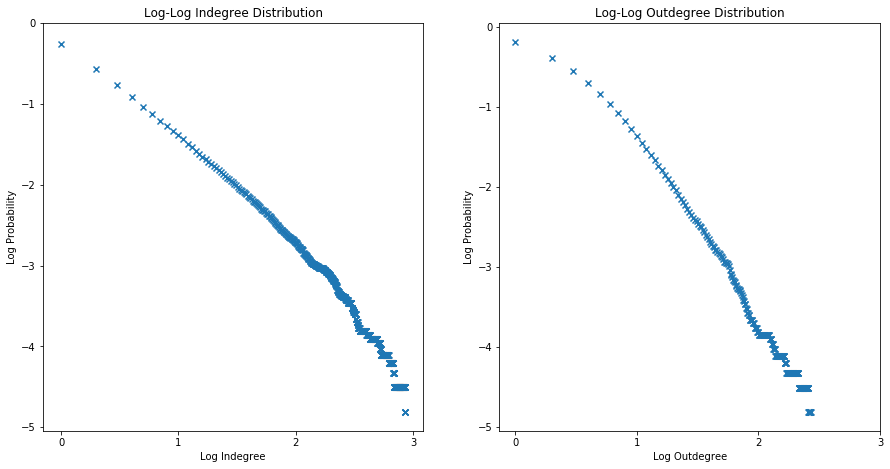

In [13]:
import matplotlib.pyplot as plt
import numpy as np

x_range = np.arange(1000, -1, -1)
y_indeg, y_outdeg = [], []

i1 = i2 = 0
for x in x_range:
    while i1 < len(sorted_indeg) and cn.in_degree(sorted_indeg[i1]) >= x:
        i1 += 1
    y_indeg.append(i1)
    
    while i2 < len(sorted_outdeg) and cn.out_degree(sorted_outdeg[i2]) >= x:
        i2 += 1
    y_outdeg.append(i2)
  
with np.errstate(divide='ignore'):
    x_range = np.log10(x_range)
    y_indeg = np.log10(np.array(y_indeg) / len(cn.nodes))
    y_outdeg = np.log10(np.array(y_outdeg) / len(cn.nodes))

fig, axs = plt.subplots(1, 2, figsize=(15, 7.5))
for ax, y_range, name in zip(axs, [y_indeg, y_outdeg], ["Indegree", "Outdegree"]):
    ax.scatter(x_range, y_range, marker='x')
    
    
    ax.set_title("Log-Log {} Distribution".format(name))
    ax.set_xlabel("Log {}".format(name))
    ax.set_ylabel("Log Probability")
    ax.set_xticks(range(4))
    ax.set_yticks(range(-5, 1))

In [10]:
se = SearchEngine(usc, network=cn)

In [11]:
def show_top_5(results):
    for res in results[:5]:
        print(location_info(res.result.id),
              "Occurrence: {:3} ".format(res.occurrence),
              "Indegree: {:3} ".format(cn.in_degree(res.result.id)),
              "PageRank: {:.2E} ".format(se.pagerank[res.result.id]))
        
results = se.search('copyright', mode='fulltext')

se.rank(results, signal='occurrence')
print("Top 5 by Occurrence:")
show_top_5(results)

se.rank(results, signal='indegree')
print("\nTop 5 by Indegree:")
show_top_5(results)

se.rank(results, signal='pagerank')
print("\nTop 5 by PageRank:")
show_top_5(results)

Top 5 by Occurrence:
Title 17  Section 115    Occurrence: 295  Indegree:   3  PageRank: 1.91E-05 
Title 17  Section 114    Occurrence: 150  Indegree:   4  PageRank: 4.20E-05 
Title 17  Section 111    Occurrence: 140  Indegree:  22  PageRank: 1.49E-04 
Title 17  Section 803    Occurrence: 131  Indegree:   3  PageRank: 1.87E-05 
Title 17  Section 304    Occurrence: 125  Indegree:   5  PageRank: 3.36E-05 

Top 5 by Indegree:
Title 26  Section 1      Occurrence:   2  Indegree: 688  PageRank: 3.45E-03 
Title 3   Section 301    Occurrence:   1  Indegree: 399  PageRank: 2.35E-03 
Title 11  Section 101    Occurrence:   1  Indegree: 339  PageRank: 1.53E-03 
Title 26  Section 501    Occurrence:   2  Indegree: 252  PageRank: 1.02E-03 
Title 39  Section 101    Occurrence:   1  Indegree: 197  PageRank: 9.72E-04 

Top 5 by PageRank:
Title 26  Section 1      Occurrence:   2  Indegree: 688  PageRank: 3.45E-03 
Title 3   Section 301    Occurrence:   1  Indegree: 399  PageRank: 2.35E-03 
Title 11  Secti

In [12]:
def show_top_5(results):
    for res in results[:5]:
        print(location_info(res.result.id),
              "Occurrence: {:3} ".format(res.occurrence),
              "Indegree: {:3} ".format(cn.in_degree(res.result.id)),
              "PageRank: {:.2E} ".format(se.pagerank[res.result.id]))
        
results = se.search('(copyright OR property) AND NOT legal', mode='boolean')

se.rank(results, signal='occurrence')
print("Top 5 by Occurrence:")
show_top_5(results)

se.rank(results, signal='indegree')
print("\nTop 5 by Indegree:")
show_top_5(results)

se.rank(results, signal='pagerank')
print("\nTop 5 by PageRank:")
show_top_5(results)

Top 5 by Occurrence:
Title 10  Section 2687   Occurrence: 305  Indegree:  39  PageRank: 3.89E-04 
Title 26  Section 856    Occurrence: 277  Indegree:  23  PageRank: 7.15E-05 
Title 26  Section 48     Occurrence: 275  Indegree: 170  PageRank: 3.96E-04 
Title 12  Section 1831q  Occurrence: 210  Indegree:   5  PageRank: 3.70E-05 
Title 11  Section 522    Occurrence: 156  Indegree:  11  PageRank: 5.89E-05 

Top 5 by Indegree:
Title 6   Section 542    Occurrence:   7  Indegree: 856  PageRank: 3.08E-03 
Title 26  Section 1      Occurrence:  23  Indegree: 688  PageRank: 3.45E-03 
Title 10  Section 101    Occurrence:   1  Indegree: 617  PageRank: 2.01E-03 
Title 31  Section 1113   Occurrence:   3  Indegree: 522  PageRank: 2.09E-03 
Title 26  Section 401    Occurrence:   4  Indegree: 336  PageRank: 1.11E-03 

Top 5 by PageRank:
Title 26  Section 1      Occurrence:  23  Indegree: 688  PageRank: 3.45E-03 
Title 6   Section 542    Occurrence:   7  Indegree: 856  PageRank: 3.08E-03 
Title 31  Secti